<b>Definitive Pandas Toolkit</b>

[Documentação-Oficial](https://pandas.pydata.org/)

Este notebook tem por objetivo realizar demonstrações práticas a respeito da biblioteca Pandas, evidenciando toda sua funcionalidade e abordando situações corriqueiras na análise e preparação de dados coletas através de Datasets.
    Com as facilidades apresentadas pelo Pandas, é possível:
* Tratar e analisar dados de difersas fontes e extensões (.csv, .json;
* Realizar Data Cleaning, Data Munging e Data Wrangling facilmente;
* Visualizar alterações em Datasets em tempo real;
* Analisar informações em formato de tabela (muito semelhante ao Excel);

Em conjunto com as demais ferramentas do <i>PyData Stack</i>, tais como Numpy e Matplotlib, o Pandas oferece a possibilidade de reunir, analisar e limpar dados de maneira eficiente e expressiva. 

# Importando biblioteca

Há basicamente duas formas diferentes de se importar uma biblioteca. A primeira delas, adotando convenções utilizadas dentro do universo do PyData Stack, utiliza "apelidos". A segunda, visando uma otimização do código, trabalha apenas com módulos específicos utilizados no código. 

In [8]:
# Importando a biblioteca pandas com "apelido" pd
import pandas as pd

In [6]:
# Importando apenas módulos específicos da biblioteca
from pandas import DataFrame, Series

In [6]:
# Verificando a versão instalada
pd.__version__

'0.22.0'

# Series

<i>class </i>pandas.<b>Series</b>(<i>data=None, index=None, name=None, copy=False, fastpath=False</i>)

[Documentacao-Oficial](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html)

O objeto do tipo Series nada mais é do que um _array_ unidimensional que contém um _array_ de <b>dados</b> e um _array_ de labels, conhecido como <b>índice</b>.

## Series sem índice 

In [9]:
# Criando uma série sem especificar os índices
series_1 = Series([10, 20, 30, 40, 50])

# Imprimindo objeto criado
print(series_1)

0    10
1    20
2    30
3    40
4    50
dtype: int64


In [10]:
# Verificando o tipo do objeto criado
type(series_1)

pandas.core.series.Series

In [11]:
# Atributo para retornar valores do objeto Series
series_1.values

array([10, 20, 30, 40, 50], dtype=int64)

In [12]:
# Atributo para retornar índices do objeto Series
series_1.index

RangeIndex(start=0, stop=5, step=1)

In [14]:
# Acessando elementos
series_1[3]

40

## Series com índice

In [13]:
# Diferente do exemplo anterior, deve-se agora especificar um índice em formato de lista
series_2 = Series([12, 5, 30, -10, 25], index=['a', 'b', 'c', 'd', 'e'])
print(series_2)

a    12
b     5
c    30
d   -10
e    25
dtype: int64


In [27]:
# Atributo para retornar valores do objeto Series
series_2.values

array([ 12,   5,  30, -10,  25], dtype=int64)

In [28]:
# Atributo para retornar índices do objeto Series
series_2.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [30]:
# Slice
series_2[series_2 > 10]

a    12
c    30
e    25
dtype: int64

In [31]:
# Busca
series_2['b']

5

In [32]:
# Operações lógicas
'b' in series_2

True

In [16]:
# Acessando elementos
series_2[:3]

a    12
b     5
c    30
dtype: int64

## Series com dicionários

In [39]:
# Criando Series através de dicionários
dicio = {'Futebol':5200, 'Tenis':120, 'Natação': 698, 'Volleyball':1550}
series_3 = Series(dicio)
print(series_3)

Futebol       5200
Natação        698
Tenis          120
Volleyball    1550
dtype: int64


In [40]:
# Verificando tipo
type(series_3)

pandas.core.series.Series

In [41]:
# Modificando índice
novo_indice = ['Futebol', 'Tenis', 'Natação', 'Basketball']
series_3 = Series(dicio, index=novo_indice)
print(series_3)

Futebol       5200.0
Tenis          120.0
Natação        698.0
Basketball       NaN
dtype: float64


Um fato curioso aconteceu: o Pandas retorno NaN para dados referentes a Basketball. Isso se deu pois, ao fazer um cruzamento com o dicionário, não foi possível encontrar uma relação entre o índice em questão com algum valor associado (de fato, não há a chave Basketball no dicionário).

<i>NaN = dados missing.

## Dados NaN 

In [42]:
# Métodos e atributos para tal
pd.isnull(series_3)

Futebol       False
Tenis         False
Natação       False
Basketball     True
dtype: bool

In [43]:
pd.notnull(series_3)

Futebol        True
Tenis          True
Natação        True
Basketball    False
dtype: bool

In [45]:
series_3.isnull()

Futebol       False
Tenis         False
Natação       False
Basketball     True
dtype: bool

In [50]:
series_3.isnull().values

array([False, False, False,  True])

In [51]:
series_3.isnull().values.any()

True

# Dataframes

<i>class </i>pandas.<b>Dataframe</b>(<i>data=None, index=None, name=None, copy=False, fastpath=False</i>)

[Documentacao-Oficial](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html)

Os Dataframes representam uma estrutura tabular, semelhante a estrutura de uma planilha do Excel, contendo uma coleção de <i>colunas</i> em que cada uma pode conter um tipo diferente de valor (int, string, boolean, etc).

Dataframes possuem <i>index</i> e <i>linhas</i> e são armazenados em um ou mais blocos <b>bidimensionais</b>, ao invés de listas/dicionários.

## Criando DataFrames

Há diversas formas de se criar DataFrames, sendo a mais comum através da leitura de arquivos externos. Entretanto, conhecer as estruturas que compõe os DataFrames é de extrema importância para uma boa análise dos dados.

In [26]:
# É possível criar Dataframes a partir de dicionários
pink_floyd_disco = {'Album':['The Dark Side of the Moon', 'Wish You Were Here', 'The Wall', 'Animals', 'The Divison Bell', 'The Final Cut'],
                    'Ano': [1973, 1975, 1979, 1977, 1994, 1983]}
df = DataFrame(pink_floyd_disco)
df

,Album,Ano
0,The Dark Side of the Moon,1973
1,Wish You Were Here,1975
2,The Wall,1979
3,Animals,1977
4,The Divison Bell,1994
5,The Final Cut,1983


In [38]:
# Também é possível obter DataFrames a partir de dados externos de arquivos
bike_sharing = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/bike_sharing_dataset/day.csv')
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Vimos que, diferente dos objetos do tipo <b>Series</b>, os <b>DataFrames</b> são compostos de dados tabulares bi-dimensionais (um exemplo são os dicionários cujos valores são listas), transformando o resultado em uma verdadeira tabela para análise. Mais adiante veremos como explorar os dados obtidos através de Series e DataFrames.

In [27]:
# Verificando o tipo do objeto criado
type(df)

pandas.core.frame.DataFrame

# Exploratory Data Analysis

É conhecido como <b>EDA</b> <i>(Exploratory Data Analysis)</i> o processo de reunir, avaliar, analisar e extrair informações a respeito de um dado Dataset. Para tal, o Pandas oferece diversas funcionalidades úteis compostas por métodos e atributos responsáveis por manipular até os mais complexos Datasets.

## Student Scores

In [45]:
# Importando biblioteca e lendo arquivo
import pandas as pd

df_student = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/student-scores.csv')

In [46]:
# Verificando informações iniciais do Dataset
df_student.head()

,ID,Name,Attendance,HW,Test1,Project1,Test2,Project2,Final
0,27604,Joe,0.96,0.97,87.0,98.0,92.0,93.0,95.0
1,30572,Alex,1.00,0.84,92.0,89.0,94.0,92.0,91.0
2,39203,Avery,0.84,0.74,68.0,70.0,84.0,90.0,82.0
3,28592,Kris,0.96,1.00,82.0,94.0,90.0,81.0,84.0
4,27492,Rick,0.32,0.85,98.0,100.0,73.0,82.0,88.0


<b>Parâmetros: </b><i>.read_csv()</i>

* sep - define o separador a ser utilizado
* header - define a linha a ser utilizada como cabeçalho
* names - utiliza uma nova lista como cabeçalho
* index_col - transforma a(s) coluna(s) passada(s) como índice(s)

Ver mais em: [read_csv-Documentacao](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)

In [48]:
# Verificando tipos primitivos das colunas
df_student.dtypes

ID              int64
Name           object
Attendance    float64
HW            float64
Test1         float64
Project1      float64
Test2         float64
Project2      float64
Final         float64
dtype: object

<b>Detalhe:</b> dados do tipo <i>string</i> são armazenados no Pandas como sendo do tipo <i>object</i>. Para verificar mais a fundo, podemos indexar a coluna para retornar um dado único e verificar seu tipo

In [50]:
# Verificando tipo primitivo da coluna 'Name'
type(df_student['Name'][0])

str

<b>Observação:</b> é interessante pensar qual o tipo primitivo o comando retornaria caso o índice [0] não estivesse presente. Algum palpite de acordo com o que já vimos até aqui? 

In [51]:
# Qual o tipo primitivo de uma única coluna?
type(df_student['Name'])

pandas.core.series.Series

In [52]:
# Realizando análises mais detalhadas nos dados
df_student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 9 columns):
ID            5 non-null int64
Name          5 non-null object
Attendance    5 non-null float64
HW            5 non-null float64
Test1         5 non-null float64
Project1      5 non-null float64
Test2         5 non-null float64
Project2      5 non-null float64
Final         5 non-null float64
dtypes: float64(7), int64(1), object(1)
memory usage: 440.0+ bytes


Percebemos que trata-se de um Dataset com uma quantidade ínfima de dados (5 linhas apenas). O método <i>.info()</i> é muito importante pois nele conseguimos identificar valores NaN em colunas (quantidade de valores na coluna será menor que a quantidade total).

In [55]:
# Retornando diretamente linhas e colunas
df_student.shape

(5, 9)

In [56]:
# Envolvendo estatística
df_student.describe()

,ID,Attendance,HW,Test1,Project1,Test2,Project2,Final
count,5.000000,5.00000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000
mean,30692.600000,0.81600,0.880000,85.40000,90.200000,86.600000,87.600000,88.000000
std,4915.212691,0.28369,0.105594,11.39298,12.049896,8.473488,5.683309,5.244044
min,27492.000000,0.32000,0.740000,68.00000,70.000000,73.000000,81.000000,82.000000
25%,27604.000000,0.84000,0.840000,82.00000,89.000000,84.000000,82.000000,84.000000
50%,28592.000000,0.96000,0.850000,87.00000,94.000000,90.000000,90.000000,88.000000
75%,30572.000000,0.96000,0.970000,92.00000,98.000000,92.000000,92.000000,91.000000
max,39203.000000,1.00000,1.000000,98.00000,100.000000,94.000000,93.000000,95.000000


O método <i>.describe()</i> é extremamente útil para visualizar alguns dados estatísticos de maneira direta. Percebe-se que o .describe() foi aplicado apenas às colunas cujo tipo primitivo pode ser tratado como numérico.

In [57]:
# Também é possível aplicar conceitos estatísticos diretamente nas colunas
df_student['Project1'].mean()

90.2

In [60]:
# Retornando as colunas do Dataset
df_student.columns

Index(['ID', 'Name', 'Attendance', 'HW', 'Test1', 'Project1', 'Test2',
       'Project2', 'Final'],
      dtype='object')

In [61]:
# Retornando valores do Dataset
df_student.values

array([[27604, 'Joe', 0.96, 0.97, 87.0, 98.0, 92.0, 93.0, 95.0],
       [30572, 'Alex', 1.0, 0.84, 92.0, 89.0, 94.0, 92.0, 91.0],
       [39203, 'Avery', 0.84, 0.74, 68.0, 70.0, 84.0, 90.0, 82.0],
       [28592, 'Kris', 0.96, 1.0, 82.0, 94.0, 90.0, 81.0, 84.0],
       [27492, 'Rick', 0.32, 0.85, 98.0, 100.0, 73.0, 82.0, 88.0]],
      dtype=object)

<b>Observação:</b> valores são retornados como um <i>ndarray</i> do <b>Numpy</b>, o qual será visto mais a frente.

In [66]:
# Modificando nomes das colunas
label = ['ID', 'Nome', 'Frequência', 'HW', 'P1', 'Lab1', 'P2', 'Lab2', 'Final']
df_student.columns = label
df_student

,ID,Nome,Frequência,HW,P1,Lab1,P2,Lab2,Final
0,27604,Joe,0.96,0.97,87.0,98.0,92.0,93.0,95.0
1,30572,Alex,1.00,0.84,92.0,89.0,94.0,92.0,91.0
2,39203,Avery,0.84,0.74,68.0,70.0,84.0,90.0,82.0
3,28592,Kris,0.96,1.00,82.0,94.0,90.0,81.0,84.0
4,27492,Rick,0.32,0.85,98.0,100.0,73.0,82.0,88.0


In [67]:
# Analisando o Dataset, é possível perceber facilmente que o ID poderia ser o índice das linhas
df_student.set_index('ID')

,Nome,Frequência,HW,P1,Lab1,P2,Lab2,Final
ID,,,,,,,,
27604,Joe,0.96,0.97,87.0,98.0,92.0,93.0,95.0
30572,Alex,1.00,0.84,92.0,89.0,94.0,92.0,91.0
39203,Avery,0.84,0.74,68.0,70.0,84.0,90.0,82.0
28592,Kris,0.96,1.00,82.0,94.0,90.0,81.0,84.0
27492,Rick,0.32,0.85,98.0,100.0,73.0,82.0,88.0


<b>Análise Final: </b> O Dataset <i>student_scores</i> é nitidamente uma ferramente para testes iniciais, provendo apenas 5 linhas para análises e poucas colunas/atributos. Entretanto, a partir de sua manipulação, foi possível treinar funções e métodos presentes em qualquer análise exploratório, como por exemplo:

* Leitura de arquivo .csv <b>.read_csv()</b>
* Visualização dos dados <b>.head()</b>
* Verificação dos tipos de dados <b>.dtypes</b>
* Informações mais detalhadas <b>.info()</b>
* Contagem de linhas e colunas <b>.shape</b>
* Informações estatísticas <b>.describe()</b>
* Média de uma coluna de dados <b>.mean()</b>
* Visualização de todas as colunas <b>.columns</b>
* Visualização de todos os valores <b>.values</b>
* Mudança de header <b>.columns = <i>label</i></b>
* Mudança de índice <b>.set_index(<i>'Column'</i>)</b>

## Powerplant

Dataset real com informações relevantes a respeito de uma Usina de Energia.

<b>Link:</b> http://archive.ics.uci.edu/ml/datasets/combined+cycle+power+plant

<b>Atributos:</b>

Features consist of hourly average ambient variables 
- Temperature (T) in the range 1.81°C and 37.11°C,
- Ambient Pressure (AP) in the range 992.89-1033.30 milibar,
- Relative Humidity (RH) in the range 25.56% to 100.16%
- Exhaust Vacuum (V) in teh range 25.36-81.56 cm Hg
- Net hourly electrical energy output (EP) 420.26-495.76 MW

In [5]:
# Importando bibliotecas e lendo arquivo
import pandas as pd

df_pp = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/powerplant.csv')
df_pp.head()

,,,,,AT;V;AP;RH;PE
14,96;41,76;1024,07;73,17;463,26.0
25,18;62,96;1020,04;59,08;444,37.0
5,11;39,4;1012,16;92,14;488,56.0
20,86;57,32;1010,24;76,64;446,48.0
10,82;37,5;1009,23;96,62;473,9.0


<b>Observação:</b> Percebe-se que o documento está separado por <b>;</b> e não por <b>,</b> e, portanto, é necessária a chamado de um parâmetro adicional - <i>sep</i>

In [6]:
# Configurando separador
df_pp = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/powerplant.csv', sep=';')
df_pp.head()

,AT,V,AP,RH,PE
0,"14,96","41,76","1024,07","73,17","463,26"
1,"25,18","62,96","1020,04","59,08","444,37"
2,"5,11","39,4","1012,16","92,14","488,56"
3,"20,86","57,32","1010,24","76,64","446,48"
4,"10,82","37,5","1009,23","96,62","473,9"


In [8]:
# Para facilitar o entendimento dos dados, é possível alterar o nome das colunas
new_columns = ['Temperature', 'Exhaust Vacuum', 'Pressure', 'RH', 'Energy Output']
df_pp.columns = new_columns
df_pp.head()

,Temperature,Exhaust Vacuum,Pressure,RH,Energy Output
0,"14,96","41,76","1024,07","73,17","463,26"
1,"25,18","62,96","1020,04","59,08","444,37"
2,"5,11","39,4","1012,16","92,14","488,56"
3,"20,86","57,32","1010,24","76,64","446,48"
4,"10,82","37,5","1009,23","96,62","473,9"


In [9]:
# Verificando linhas e colunas
df_pp.shape

(9568, 5)

In [10]:
# Informações adicionais
df_pp.dtypes

Temperature       object
Exhaust Vacuum    object
Pressure          object
RH                object
Energy Output     object
dtype: object

<b>Observação:</b> Aparentemente todos os dados estão armazenados como <i>string</i>.

In [11]:
# Verificando mais a fundo
type(df_pp['RH'][0])

str

In [12]:
# Envolvendo estatística
df_pp.describe()

,Temperature,Exhaust Vacuum,Pressure,RH,Energy Output
count,9568,9568,9568,9568,9568
unique,2773,634,2517,4546,4836
top,"25,21","70,32","1013,88","100,09","468,8"
freq,14,61,16,26,9


In [14]:
# Verificando valores NaN
df_pp.isnull().any()

Temperature       False
Exhaust Vacuum    False
Pressure          False
RH                False
Energy Output     False
dtype: bool

In [15]:
# Uma outra forma de contabilizar seria com a função .sum()
df_pp.isnull().sum()

Temperature       0
Exhaust Vacuum    0
Pressure          0
RH                0
Energy Output     0
dtype: int64

In [16]:
# Salvando alterações no cabeçalho em novo arquivo .csv
df_pp.to_csv('C:/Users/thiagoPanini/Downloads/datasets/powerplant_edited.csv')

In [18]:
df_pp_edited = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/powerplant_edited.csv')
df_pp_edited.head()

,Unnamed: 0,Temperature,Exhaust Vacuum,Pressure,RH,Energy Output
0,0,"14,96","41,76","1024,07","73,17","463,26"
1,1,"25,18","62,96","1020,04","59,08","444,37"
2,2,"5,11","39,4","1012,16","92,14","488,56"
3,3,"20,86","57,32","1010,24","76,64","446,48"
4,4,"10,82","37,5","1009,23","96,62","473,9"


<b>Observação:</b> Inesperadamente surgiu uma coluna chamada <b>Unnamed: 0</b> no Dataset. Isto pode ser resolvido passando alguns parâmetros na hora de salvar o novo Dataset em formato .csv

In [19]:
df_pp.to_csv('C:/Users/thiagoPanini/Downloads/datasets/powerplant_edited.csv', index=False)

In [20]:
df_pp_edited = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/powerplant_edited.csv')
df_pp_edited.head()

,Temperature,Exhaust Vacuum,Pressure,RH,Energy Output
0,"14,96","41,76","1024,07","73,17","463,26"
1,"25,18","62,96","1020,04","59,08","444,37"
2,"5,11","39,4","1012,16","92,14","488,56"
3,"20,86","57,32","1010,24","76,64","446,48"
4,"10,82","37,5","1009,23","96,62","473,9"


<b>Análise Final: </b> Os dados contidos em <i>powerplant</i> são extremamente úteis pois são reais. De fato, a quantidade de linhas e colunas se assemelha muito ao que se encontra por aí afora. Entretanto, como não havia nenhum problema específico a ser resolvido, muito menos alguma investigação especial, o objetivo trazido por esta sessão foi o de familiarização com algumas funções adicionais do Pandas, bem como a gravação das edições realizadas em um novo arquivo .csv. A mudança no cabeçalho (header) também foi algo a ser destacado. Dessa forma, foram utilizadas as seguintes funcionalidades:

* Leitura de arquivo .csv <b>.read_csv()</b>
* Trabalhar com separador diferente <b>sep=';'</b>
* Visualização dos dados <b>.head()</b>
* Verificação dos tipos de dados <b>.dtypes</b>
* Contagem de linhas e colunas <b>.shape</b>
* Informações mais detalhadas <b>.info()</b>
* Informações estatísticas <b>.describe()</b>
* Mudança de header <b>.columns = <i>new_columns</i></b>
* Salvando alterações em um novo arquivo <b>df.to_csv<i>(path, index=False)</i></b>

## Census Income

O Dataset em questão fornece informações relevantes a respeito de dados coletados pelo Censo americano. Atributos como <i>idade, salário, ocupação, educação, </i>entre outros formam este conjunto de dados.

<b>Link:</b> https://archive.ics.uci.edu/ml/datasets/Census+Income

In [45]:
# Importando bibliotecas e lendo arquivo
import pandas as pd

df_census = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/census_income.csv')
df_census.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [46]:
# Verificando quantidade de linhas e colunas
df_census.shape

(32561, 15)

In [47]:
# Verificando informações meis detalhadas
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


<b>Diagnóstico importante:</b> Sabendo a quantidade total de linhas do Dataset, com a função <i>.info()</b>, é possível saber se há valores missing (NaN) em alguma coluna. Neste caso, a resposta é <b>não</b> porém, de toda forma, é possível conferir com a função abaixo

In [48]:
# Há algum valor NaN?
df_census.isnull().values.any()

False

In [49]:
# Há linhas duplicadas?
df_census.duplicated().any()

True

In [50]:
# Verificando valores duplicados através de uma função
def has_duplicated(df):
    if df.duplicated().any():
        print(f'Há {df.duplicated().sum()} valores duplicados.')
    else:
        print('Não há valores duplicados.')

In [51]:
has_duplicated(df_census)

Há 24 valores duplicados.


Ao encontrar dados duplicados em um Dataset, é necessário realizar a seguinte <b>análise: </b>Faz sentido eliminar dados duplicados?

Caso caso é um caso particular. Quando se fala em pesquisas de Censo, será que é um total absurdo encontrar dados duplicados? É possível que as pessoas da pesquisa possuam mesmo cargo, salário, educação, relacionamento, etc? 

MINHA análise: sim.

Portanto, EU decidi não eliminar os dados duplicados com a função .drop_duplicates(inplace=True)

In [144]:
# Verificando instâncias únicas do Dataset
df_census.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
native-country       42
income                2
dtype: int64

<b>Pergunta 1: </b>
<i>Qual a média de idade e de salário da pesquisa realizada?</i>

In [52]:
# Média de Idade
print(f'A média de idade é de aproximadamente {int(df_census["age"].mean())} anos')

A média de idade é de aproximadamente 38 anos


In [54]:
# Média de Salário
print(f'Em média, o salário dos integrantes da pesquisa é de US${df_census["capital-gain"].mean():.2f}')

Em média, o salário dos integrantes da pesquisa é de US$1077.65


<b>Pergunta 2: </b>
<i>Quantas entradas diferentes temos para a coluna Gênero? Conte as instâncias de cada uma delas.</i>

In [61]:
# Verificando entradas diferentes
df_census['sex'].nunique()

2

In [63]:
# Verificando quais as entradas únicas e em quais quantidades
df_census['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [77]:
# Comunicando resultado
print(f"Há {df_census['sex'].value_counts()[0]} pessoas cadastradas com gênero 'Masculino'")
print(f"Há {df_census['sex'].value_counts()[1]} pessoas cadastradas com gênero 'Feminino'")

Há 21790 pessoas cadastradas com gênero 'Masculino'
Há 10771 pessoas cadastradas com gênero 'Feminino'


In [78]:
# Uma outra forma de análisar seria aplicar o método .describe() à Series de gênero
df_census['sex'].describe()

count     32561
unique        2
top        Male
freq      21790
Name: sex, dtype: object

<b>Pergunta 3:</b> <i>'Splitar'</i> o Dataset em questão e separa-lo em dois outros Datasets:

* Dataset df_rich com pessoas que ganham de 2.500,00 dols para cima
* Dataset df_humble com pessoas que ganham abaixo de 2.500,00 dols

In [91]:
# Slice com parâmetro lógico
df_rich = df_census[df_census['capital-gain'] >= 2500]
df_rich.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
59,30,Private,188146,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,5013,0,40,United-States,<=50K
84,44,Private,343591,HS-grad,9,Divorced,Craft-repair,Not-in-family,White,Female,14344,0,40,United-States,>50K
101,44,Private,198282,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,15024,0,60,United-States,>50K


<b>Curiosidade:</b> qual o resultado do argumento df_census['capital-gain'] > 2500 ?

In [92]:
# Curiosidade
df_census['capital-gain'] >= 2500

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8         True
9         True
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
32531    False
32532    False
32533    False
32534    False
32535    False
32536    False
32537    False
32538     True
32539    False
32540    False
32541    False
32542    False
32543    False
32544    False
32545    False
32546    False
32547    False
32548    False
32549    False
32550    False
32551    False
32552    False
32553    False
32554    False
32555    False
32556    False
32557    False
32558    False
32559    False
32560     True
Name: capital-gain, Length: 32561, dtype: bool

<b>Interessante!</b> Trata-se de um array de booleanos. Em outras palavras, o Slice, nesse caso, funcionou através de um argumento de booleanos onde foi selecionado apenas os valores <b>True</b> que satisfaziam a condição passada.

In [90]:
# Contando valores do novo data_set por dois modos diferentes:
(df_census['capital-gain'] >= 2500).sum()

2380

In [89]:
df_rich.shape[0]

2380

In [93]:
# Trabalhando no outro Dataset
df_humble = df_census[df_census['capital-gain'] < 2500]
df_humble.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [94]:
df_humble.shape[0]

30181

In [95]:
# Comunicando resultado
print(f'Há {df_rich.shape[0]} pessoas que ganham US$2.500,00 ou mais')
print(f'Há {df_humble.shape[0]} pessoas que ganham abaixo de US$2.500,00')

Há 2380 pessoas que ganham US$2.500,00 ou mais
Há 30181 pessoas que ganham abaixo de US$2.500,00


<b>Pergunta 4:</b> Há alguma relação entre o salário e a coluna 'native-country'?

Para responder esta pergunta, o ideal seria usar propriedades gráficas. Porém, para fins didáticos, vamos tentar realizar as operações através de contagem de instâncias. As propriedades gráficas com Pandas serão introduzidas nas próximas sessões.

In [98]:
# Verificando entradas diferentes no DataFrame rich
df_rich['native-country'].value_counts()

 United-States         2176
 ?                       44
 Mexico                  18
 Philippines             13
 India                   12
 Germany                 11
 Canada                  10
 Japan                    8
 El-Salvador              8
 England                  7
 Puerto-Rico              6
 Italy                    6
 Cuba                     5
 Poland                   5
 Iran                     5
 South                    5
 Vietnam                  4
 China                    4
 Greece                   4
 Guatemala                3
 Jamaica                  3
 Columbia                 3
 Taiwan                   2
 Ecuador                  2
 France                   2
 Ireland                  2
 Portugal                 2
 Nicaragua                2
 Dominican-Republic       2
 Cambodia                 2
 Laos                     1
 Yugoslavia               1
 Hungary                  1
 Scotland                 1
Name: native-country, dtype: int64

In [99]:
# Verificando entradas diferentes no DataFrame humble
df_humble['native-country'].value_counts()

 United-States                 26994
 Mexico                          625
 ?                               539
 Philippines                     185
 Germany                         126
 Canada                          111
 Puerto-Rico                     108
 El-Salvador                      98
 Cuba                             90
 India                            88
 England                          83
 Jamaica                          78
 South                            75
 China                            71
 Dominican-Republic               68
 Italy                            67
 Vietnam                          63
 Guatemala                        61
 Columbia                         56
 Poland                           55
 Japan                            54
 Taiwan                           49
 Haiti                            44
 Iran                             38
 Portugal                         35
 Nicaragua                        32
 Peru                             31
 

Caminho: verificar porcentagem.

In [123]:
# Porcentagem dos ricos nativos dos EUA
eua_rich = df_rich['native-country'].value_counts().max() / df_rich['native-country'].value_counts().sum()
print(f'{100*eua_rich:.2f}% dos maiores salários são de pessoas nativas dos EUA.')
print(f'Da mesma forma, {(100-(100*eua_rich)):.2f}% dos maiores salários são oriundos de "imigrantes".')

91.43% dos maiores salários são de pessoas nativas dos EUA.
Da mesma forma, 8.57% dos maiores salários são oriundos de "imigrantes".


In [138]:
# Porcentagem dos "pobres" nativos dos EUA (calculado de forma diferentes do calculado acima)

# Transformando apenas a coluna em questão em um objeto do tipo Series
df_humble_sal = df_humble['native-country'].value_counts()
immigrants_humble = (df_humble_sal.sum()-df_humble_sal[' United-States']) / df_humble_sal.sum()
eua_humble = 1-immigrants_humble
print(f'{100*immigrants_humble:.2f}% dos menores salários provém de "imigrantes" nos EUA.')
print(f'Da mesma forma, {100*eua_humble:.2f}% dos menores salários são de americanos nativos.')

10.56% dos menores salários provém de "imigrantes" nos EUA.
Da mesma forma, 89.44% dos menores salários são de americanos nativos.


<b>Análise Final: </b> Com o Dataset <i>census_income</i> foi possível trabalhar de maneira mais limpa e clara com as funções tratadas em outros Datasets vistos anteriormente. Neste caso, haviam perguntas a serem respondidades e análises a serem feitas. Obviamente, este tipo de informação (censo) abre margem para uma infinidade de perguntas e respostas que podem ser respondidades, principalmente, através de análises gráficas. Neste passo inicial, foram trabalhadas diversas funções, das quais destacaram-se:

* Contagem de valores em um objeto do tipo Series (coluna específica): <b><i>Series</i>.value_counts()</b>
* Soma de valores em um objeto do tipo Series (coluna específica): <b><i>Series</i>.sum()</b>
* Retornando máximo valor em uma coluna específica: <b><i>Series</i>.max()</b>
* Calculando média de uma coluna específica: <b><i>Series</i>.max()</b>
* Informações estatísticas <b>.describe()</b>
* Contagem de linhas e colunas <b>.shape</b>

## Chicago Bike Share

As informações trazidas pelo Dataset de aluguel de bicicletas em Chicago foi utilizado no <i>Projeto 1</i> do curso da Udacity a fim de responder algumas questões bem específicas (sem utilizar Pandas). Dessa vez, todas as funcionalidades da biblioteca serão utilizadas afim de extrair algumas informações e trabalhar de forma a preparar o Dataset para futuras análises.

<b>Link:</b> https://www.divvybikes.com/system-data

In [195]:
# Importando bibliotecas e lendo arquivo
import pandas as pd

df_bike = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/chicago.csv')
df_bike.head()

,Start Time,End Time,Trip Duration,Start Station,End Station,User Type,Gender,Birth Year
0,2017-01-01 00:00:36,2017-01-01 00:06:32,356,Canal St & Taylor St,Canal St & Monroe St (*),Customer,NaN,NaN
1,2017-01-01 00:02:54,2017-01-01 00:08:21,327,Larrabee St & Menomonee St,Sheffield Ave & Kingsbury St,Subscriber,Male,1984.0
2,2017-01-01 00:06:06,2017-01-01 00:18:31,745,Orleans St & Chestnut St (NEXT Apts),Ashland Ave & Blackhawk St,Subscriber,Male,1985.0
3,2017-01-01 00:07:28,2017-01-01 00:12:51,323,Franklin St & Monroe St,Clinton St & Tilden St,Subscriber,Male,1990.0
4,2017-01-01 00:07:57,2017-01-01 00:20:53,776,Broadway & Barry Ave,Sedgwick St & North Ave,Subscriber,Male,1990.0


<b>Observação:</b> Temos colunas que se referem à datas. 

In [196]:
# Linhas e colunas
print(f'Linhas: {df_bike.shape[0]}\nColunas: {df_bike.shape[1]}')

Linhas: 1551505
Colunas: 8


In [197]:
# Vamos verificar os tipos primitivos.
df_bike.dtypes

Start Time        object
End Time          object
Trip Duration      int64
Start Station     object
End Station       object
User Type         object
Gender            object
Birth Year       float64
dtype: object

In [198]:
# Verificando tipo de Start Time
type(df_bike['Start Time'][0])

str

In [199]:
# Convertendo colunas de datas em timestamp
df_bike['Start Time'] = pd.to_datetime(df_bike['Start Time'])
df_bike['End Time'] = pd.to_datetime(df_bike['End Time'])

In [200]:
# Verificando tipos convertidos
print(type(df_bike['Start Time'][0]))
print(type(df_bike['End Time'][0]))

<class 'pandas._libs.tslib.Timestamp'>
<class 'pandas._libs.tslib.Timestamp'>


Referência: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html

In [201]:
# Novos tipos
df_bike.dtypes

Start Time       datetime64[ns]
End Time         datetime64[ns]
Trip Duration             int64
Start Station            object
End Station              object
User Type                object
Gender                   object
Birth Year              float64
dtype: object

<b>Pergunta 1:</b> <i>Há valores missing (NaN) no Dataset?</i> 

In [202]:
# Verificando NaN
df_bike.isnull().any()

Start Time       False
End Time         False
Trip Duration    False
Start Station    False
End Station      False
User Type        False
Gender            True
Birth Year        True
dtype: bool

Percebe-se que há valores NaN em duas colunas diferentes, <b>Gender</b> e <b>Birth Year</b>. Vamos contabilizar os valores NaN de cada coluna.

In [203]:
# Contabilizando NaN da coluna Gender
df_bike['Gender'].isnull().sum()

316867

In [204]:
# Contabilizando NaN da coluna Birth Year
df_bike['Birth Year'].isnull().sum()

316683

<b>Análise:</b> Como a coluna 'Gênero' não é numérica, não é possível inferir qual o gênero corresponde às linhas com NaN. No caso da coluna 'Birth Year', poderíamos preencher os valores vazios com a média, porém acredito se tratar de uma análise muito superficial, visto que o espectro dado por Birth Year é bem abrangente. A fidelidade dos dados seria prejudicada.

<b>Pergunta 2:</b> <i>Há dados duplicados?</i>

In [205]:
# Verificando se há dados duplicados
df_bike.duplicated().any()

True

In [206]:
# Quantidade de linhas duplicadas
df_bike.duplicated().sum()

286

<b>Pergunta 2:</b> <i>Caso existir linhas duplicadas, eliminá-las.</i>

In [207]:
# Verificando quantidade de linhas do Dataset antes da eliminação
print(f'O Dataset original possui {df_bike.shape[0]} linhas.')

# Dropando linhas duplicadas
df_bike.drop_duplicates(inplace=True)
print(f'Após o drop_duplicates, o Dataset tem {df_bike.shape[0]} linhas.')

O Dataset original possui 1551505 linhas.
Após o drop_duplicates, o Dataset tem 1551219 linhas.


<b>Pergunta 3:</b> <i>Qual a duração média das viagens realizadas? Mostre também a viagem de menor e maior tempo de duração.</i>

In [208]:
# Calculando média
df_bike['Trip Duration'].mean()

939.7540237709827

In [209]:
# Máximo
df_bike['Trip Duration'].max()

86338

In [210]:
# Mínimo
df_bike['Trip Duration'].min()

60

<b>Pergunta 4:</b> <i>Há relação entre o ano de nascimento e o gênero de quem aluga bicicletas?</i>

In [212]:
# Separando Dataset por Gênero Masculino
df_bike_m = df_bike.loc[lambda df: df['Gender'] == 'Male']
df_bike_m.head()

,Start Time,End Time,Trip Duration,Start Station,End Station,User Type,Gender,Birth Year
1,2017-01-01 00:02:54,2017-01-01 00:08:21,327,Larrabee St & Menomonee St,Sheffield Ave & Kingsbury St,Subscriber,Male,1984.0
2,2017-01-01 00:06:06,2017-01-01 00:18:31,745,Orleans St & Chestnut St (NEXT Apts),Ashland Ave & Blackhawk St,Subscriber,Male,1985.0
3,2017-01-01 00:07:28,2017-01-01 00:12:51,323,Franklin St & Monroe St,Clinton St & Tilden St,Subscriber,Male,1990.0
4,2017-01-01 00:07:57,2017-01-01 00:20:53,776,Broadway & Barry Ave,Sedgwick St & North Ave,Subscriber,Male,1990.0
5,2017-01-01 00:10:44,2017-01-01 00:21:27,643,State St & Kinzie St,Wells St & Polk St,Subscriber,Male,1970.0


In [213]:
# Separando Dataset por Gênero Feminino
df_bike_f = df_bike[df_bike['Gender'] == 'Female']
df_bike_f.head()

,Start Time,End Time,Trip Duration,Start Station,End Station,User Type,Gender,Birth Year
10,2017-01-01 00:17:13,2017-01-01 11:03:34,38781,Wilton Ave & Diversey Pkwy,Halsted St & Wrightwood Ave,Subscriber,Female,1988.0
14,2017-01-01 00:25:47,2017-01-01 00:39:53,846,Ravenswood Ave & Lawrence Ave,Clarendon Ave & Gordon Ter,Subscriber,Female,1987.0
18,2017-01-01 00:27:28,2017-01-01 00:42:44,916,Millennium Park,Michigan Ave & 18th St,Subscriber,Female,1990.0
20,2017-01-01 00:27:52,2017-01-01 00:33:46,354,Paulina Ave & North Ave,Damen Ave & Division St,Subscriber,Female,1982.0
22,2017-01-01 00:30:10,2017-01-01 01:10:34,2424,Lake Shore Dr & Ohio St,Broadway & Barry Ave,Subscriber,Female,1985.0


In [220]:
# Separando Dataset por Gênero Indefinido (NaN)
df_bike_null = df_bike[df_bike['Gender'].isnull()]
df_bike_null.head()

,Start Time,End Time,Trip Duration,Start Station,End Station,User Type,Gender,Birth Year
0,2017-01-01 00:00:36,2017-01-01 00:06:32,356,Canal St & Taylor St,Canal St & Monroe St (*),Customer,NaN,NaN
7,2017-01-01 00:14:57,2017-01-01 00:26:22,685,Daley Center Plaza,Canal St & Monroe St (*),Customer,NaN,NaN
8,2017-01-01 00:15:03,2017-01-01 00:26:28,685,Daley Center Plaza,Canal St & Monroe St (*),Customer,NaN,NaN
9,2017-01-01 00:17:01,2017-01-01 00:29:49,768,Dayton St & North Ave,Ogden Ave & Chicago Ave,Customer,NaN,NaN
11,2017-01-01 00:18:28,2017-01-01 00:31:05,757,Canal St & Madison St,LaSalle St & Illinois St,Customer,NaN,NaN


<b>Observação:</b> Aparentemente, todo mundo que não preencheu o Gênero, também não preencheu o Ano de Nascimento (NaN em ambas as colunas). Vejamos.

In [225]:
# Analisando contagem de linhas do df_bike_null
print(f'Há {df_bike_null.shape[0]} linhas no Dataset de gêneros NaN.')
print(f'Há {df_bike_null["Birth Year"].isnull().sum()} valores NaN na coluna Birth Year deste mesmo Dataset.')

Há 316708 linhas no Dataset de gêneros NaN.
Há 316524 valores NaN na coluna Birth Year deste mesmo Dataset.


In [227]:
# Valores de Ano de Nascimento preenchido no Dataset de Gêneros não definidos
df_bike_null.shape[0] - df_bike_null["Birth Year"].isnull().sum()

184

Apenas 184 valores estão preenchidos na coluna Birth Year. Não vale a pena continuar a análise para Ano de Nascimento nesta coluna. Entretanto, já é possível perceber que a coluna Trip Duration possui valores preenchidos. A próxima análise será baseada nela.

In [228]:
# Média de Idade - Gênero Masculino
df_bike_m['Birth Year'].mean()

1980.3808583898299

In [230]:
# Méda de Idade - Gênero Feminino
df_bike_f['Birth Year'].mean()

1982.3731603064678

<i>Conclusão:</i> Não há diferenças significativas na idade de pessoas dos gêneros Masculino e Feminino que alugam bicicletas em Chicago. 

<b>Pergunta 5:</b> <i>Há mais algum insight relacionado à coluna Gênero?

In [231]:
# Estatísticas do Gênero Masculino
df_bike_m.describe()

,Trip Duration,Birth Year
count,935752.000000,935752.000000
mean,673.057096,1980.380858
std,988.911143,11.097314
min,60.000000,1899.000000
25%,338.000000,1974.000000
50%,541.000000,1984.000000
75%,861.000000,1989.000000
max,86096.000000,2016.000000


In [232]:
# Estatísticas do Gênero Feminino
df_bike_f.describe()

,Trip Duration,Birth Year
count,298759.000000,298759.000000
mean,783.655388,1982.373160
std,1140.234280,10.515071
min,60.000000,1915.000000
25%,398.000000,1978.000000
50%,648.000000,1986.000000
75%,1010.000000,1990.000000
max,85782.000000,2004.000000


In [233]:
# Estatisticas de Gênero NaN
df_bike_null.describe()

,Trip Duration,Birth Year
count,316708.000000,184.0
mean,1874.994231,1980.0
std,2756.095575,0.0
min,60.000000,1980.0
25%,927.000000,1980.0
50%,1379.000000,1980.0
75%,1962.000000,1980.0
max,86338.000000,1980.0


In [242]:
# Comunicando resultados
print(f'Duração média de viagem do gênero Masculino: {df_bike_m["Trip Duration"].mean():.2f}s')
print(f'Duração média de viagem do gênero Feminino: {df_bike_f["Trip Duration"].mean():.2f}s')
print(f'Duração média de viagem de gêneros Indefinidos: {df_bike_null["Trip Duration"].mean():.2f}s')

Duração média de viagem do gênero Masculino: 673.06s
Duração média de viagem do gênero Feminino: 783.66s
Duração média de viagem de gêneros Indefinidos: 1874.99s


<i>Conclusão:</i> Gêneros não definidos possuem a maior média de Duração de Viagem (Trip Duration). Gêneros Femininos possuem maior Duração média de Viagem do que Gêneros Masculinos.

<b>Análise Final: </b> O Dataset <i>chicago</i>, como dito anteriormente, foi responsável por disponibilizar as análises ncessárias para conclusão do Projeto 1 dentro o curso da Udacity. Diferente do que foi visto até o momento, as funções trabalhadas se resumiram a:

* Verificação de linhas e colunas: <b>.shape</b>
* Verificação de tipos primitivos: <b>.dtypes</b>
* Transformação de string para timestamp: <b>pd.to_datetime(<i>Series</i>)</b>
* Verificação de valores nulos: <b>.isnull().any()</b>
* Contagem de valores nulos: <b>.isnull().sum()</b>
* Verificação de linhas duplicadas: <b>.duplicated().any()</b>
* Contagem de linhas duplicadas: <b>.duplicated().sum()</b>
* Deletando linhas duplicadas: <b>.drop_duplicates(<i>inplace=True</i>)</b>
* Separando Datasets: <b>.loc[<i>boolean</i>]</b>
* Cálculo de média: <b>.mean()</b>
* Análise estatística: <b>.describe()</b>

## Cancer Data

O arquivo <i>cancer-data</i> contém informações reais a respeito de características específicas de tumores, tais como diâmetro, textura, area, concavidade e uma série de atributos, incluindo uma coluna que define se o tumor é Maligno (M) ou Benigno (B).

In [244]:
# Importando bibliotecas e lendo arquivo
import pandas as pd

df_cancer = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/cancer-data.csv')
df_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_max,texture_max,perimeter_max,area_max,smoothness_max,compactness_max,concavity_max,concave_points_max,symmetry_max,fractal_dimension_max
0,842302,M,17.99,NaN,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,NaN,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,NaN,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,NaN,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [245]:
# Contagem de linhas e colunas
print(f'Linhas: {df_cancer.shape[0]}\nColunas: {df_cancer.shape[1]}')

Linhas: 569
Colunas: 32


In [246]:
# Verificando dados missing
df_cancer.isnull().any()

id                        False
diagnosis                 False
radius_mean               False
texture_mean               True
perimeter_mean            False
area_mean                 False
smoothness_mean            True
compactness_mean          False
concavity_mean            False
concave_points_mean       False
symmetry_mean              True
fractal_dimension_mean    False
radius_SE                 False
texture_SE                 True
perimeter_SE              False
area_SE                   False
smoothness_SE              True
compactness_SE            False
concavity_SE              False
concave_points_SE         False
symmetry_SE                True
fractal_dimension_SE      False
radius_max                False
texture_max                True
perimeter_max             False
area_max                  False
smoothness_max             True
compactness_max           False
concavity_max             False
concave_points_max        False
symmetry_max               True
fractal_

Diversas colunas possuem valores missing (marcadas como <i>True</i>)

In [251]:
# Contagem de valores missing
df_cancer.isnull().values.sum()

402

In [253]:
# Tratando valores nulos de apenas 1 coluna: texture_mean
df_cancer['texture_mean'].isnull().sum()

21

In [255]:
# Preenchendo dados missing com a média
media = df_cancer['texture_mean'].mean()
df_cancer['texture_mean'].fillna(media, inplace=True)

In [256]:
# Verificando nova quantidade de missing
df_cancer['texture_mean'].isnull().sum()

0

In [258]:
# Verificando linhas duplicadas
df_cancer.duplicated().any()

True

In [259]:
# Contando linhas duplicadas
df_cancer.duplicated().sum()

5

<i>Análise:</i> Como há uma coluna <b>id</b> neste Dataset, dados duplicados não são úteis.

In [260]:
# Eliminando dados duplicados
df_cancer.drop_duplicates(inplace=True)

In [261]:
# Verificando linhas duplicadas após exclusão
df_cancer.duplicated().any()

False

In [262]:
# Contagem de linhas duplicadas após exclusçao
df_cancer.duplicated().sum()

0

Como dito acima, há uma coluna <i>id</i> no Dataset o que, de fato, abre espaço para transforma-la em index.

In [265]:
df_cancer.set_index('id', inplace=True)
df_cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_max,texture_max,perimeter_max,area_max,smoothness_max,compactness_max,concavity_max,concave_points_max,symmetry_max,fractal_dimension_max
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,19.293431,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,NaN,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.770000,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.250000,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.380000,77.58,386.1,NaN,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,NaN,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.340000,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


É possível selecionar dados usando `loc` e `iloc`, cujos detalhes podem ser lidos na [documentação oficial](https://pandas.pydata.org/pandas-docs/stable/indexing.html). `loc` usa rótulos de linhas ou colunas para selecionar dados, enquanto `iloc` usa índices. Vamos usar estes para indexar o dataframe abaixo e separar apenas os dados <b>médios</b> dos atributos relacionados aos tumores.

In [266]:
# Verificando colunas e seus respectivos índices
for i, v in enumerate(df_cancer.columns):
    print(i, v)

0 diagnosis
1 radius_mean
2 texture_mean
3 perimeter_mean
4 area_mean
5 smoothness_mean
6 compactness_mean
7 concavity_mean
8 concave_points_mean
9 symmetry_mean
10 fractal_dimension_mean
11 radius_SE
12 texture_SE
13 perimeter_SE
14 area_SE
15 smoothness_SE
16 compactness_SE
17 concavity_SE
18 concave_points_SE
19 symmetry_SE
20 fractal_dimension_SE
21 radius_max
22 texture_max
23 perimeter_max
24 area_max
25 smoothness_max
26 compactness_max
27 concavity_max
28 concave_points_max
29 symmetry_max
30 fractal_dimension_max


Queremos selecionar TODOS os dados `[:]` da coluna 0 até a coluna 10 `[:,:11]`

In [268]:
# Utilizando índices (iloc)
df_cancer_means = df_cancer.iloc[:, :11]
df_cancer_means.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean
id,,,,,,,,,,,
842302,M,17.99,19.293431,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
842517,M,20.57,17.770000,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
84300903,M,19.69,21.250000,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
84348301,M,11.42,20.380000,77.58,386.1,NaN,0.28390,0.2414,0.10520,0.2597,0.09744
84358402,M,20.29,14.340000,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [269]:
# Utilizando keys (loc)
df_cancer_means = df_cancer.loc[:, 'diagnosis':'fractal_dimension_mean']
df_cancer_means.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean
id,,,,,,,,,,,
842302,M,17.99,19.293431,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
842517,M,20.57,17.770000,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
84300903,M,19.69,21.250000,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
84348301,M,11.42,20.380000,77.58,386.1,NaN,0.28390,0.2414,0.10520,0.2597,0.09744
84358402,M,20.29,14.340000,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


<b>Bônus: Selecionando múltiplos intervalos no Pandas</b>

Selecionar as colunas para o dataframe de médias foi bem direto - as colunas que precisávamos selecionar estavam todas juntas (`id`, `diagnosis` e as colunas relacionadas à média). Agora temos um pequeno problema quando tentamos fazer o mesmo para desvio padrão (SE) ou valores máximos. As colunas `id` e `diagnosis` estão separadas do restante das colunas de que precisamos! Não conseguimos especificar todas estas em um só intervalo.

Primeiro, tente criar o dataframe de desvios padrão por conta própria, para entender por que fazer isto usando apenas `loc` e `iloc` não é possível. Então, use este [link do stackoverflow](https://stackoverflow.com/questions/41256648/select-multiple-ranges-of-columns-in-pandas-dataframe) para aprender como selecionar múltiplos intervalos no Pandas e tente fazê-lo abaixo. A propósito, para descobrir como fazer isso por conta própria, eu encontrei esse link googlando "how to select multiple ranges df.iloc".

*Dica: Talvez você tenha que importar um novo pacote!*

In [271]:
# Este novo pacote é o Numpy, pois vamos criar um ndarray para especificar o intervalo
import numpy as np

for i, v in enumerate(df_cancer.columns):
    print(i, v)

0 diagnosis
1 radius_mean
2 texture_mean
3 perimeter_mean
4 area_mean
5 smoothness_mean
6 compactness_mean
7 concavity_mean
8 concave_points_mean
9 symmetry_mean
10 fractal_dimension_mean
11 radius_SE
12 texture_SE
13 perimeter_SE
14 area_SE
15 smoothness_SE
16 compactness_SE
17 concavity_SE
18 concave_points_SE
19 symmetry_SE
20 fractal_dimension_SE
21 radius_max
22 texture_max
23 perimeter_max
24 area_max
25 smoothness_max
26 compactness_max
27 concavity_max
28 concave_points_max
29 symmetry_max
30 fractal_dimension_max


Queremos a coluna 0 (diagnosis) <b>e</b> as colunas de índice 11 até 20.

In [276]:
# Selecionando colunas SE (incluindo diagnosis e id (índice do Dataset))
df_cancer_se = df_cancer.iloc[:, np.r_[0, 11:21]]
df_cancer_se.head()

,diagnosis,radius_SE,texture_SE,perimeter_SE,area_SE,smoothness_SE,compactness_SE,concavity_SE,concave_points_SE,symmetry_SE,fractal_dimension_SE
id,,,,,,,,,,,
842302,M,1.0950,NaN,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193
842517,M,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532
84300903,M,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571
84348301,M,0.4956,1.1560,3.445,27.23,NaN,0.07458,0.05661,0.01867,0.05963,0.009208
84358402,M,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115


In [277]:
# Realizando o mesmo procedimento para atributos max
df_cancer_max = df_cancer.iloc[:, np.r_[0, 21:31]]
df_cancer_max.head()

,diagnosis,radius_max,texture_max,perimeter_max,area_max,smoothness_max,compactness_max,concavity_max,concave_points_max,symmetry_max,fractal_dimension_max
id,,,,,,,,,,,
842302,M,25.38,NaN,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,14.91,26.50,98.87,567.7,NaN,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Salvando todos os 3 novos Datasets em arquivos `.csv`

In [278]:
# cancer_means
df_cancer_means.to_csv('C:/Users/thiagoPanini/Downloads/datasets/cancer_means.csv', index=False)

# cancer_SE
df_cancer_se.to_csv('C:/Users/thiagoPanini/Downloads/datasets/cancer_se.csv', index=False)

# cancer_max
df_cancer_max.to_csv('C:/Users/thiagoPanini/Downloads/datasets/cancer_max.csv', index=False)

<b>Análise Final: </b> O Dataset *cancer_data* certamente foi o mais completo e complexo até o momento trabalhado. Possuindo uma grande quantidade de colunas, uma grande quantidade de valores missing e, por fim, uma grande quantidade de linhas duplicadas. Todos estes processos foram tratados, além da transformação da coluna id como índice e também do _split_ do Dataset em três novos arquivos através dos métodos `.loc()` e `.iloc()`. Além dos atributos e métodos básicos tratados até aqui, destacam-se:

* Transformação de índice: <b>.set_index<i>('column_name')</i></b>
* Verificação de valores missing: <b>.isnull().any()</b>
* Contagem de valores missing: <b>.isnull().values.sum()</b>
* Preenchimento de valores missing com média: <b>.fillna<i>(media, inplace=True)</i></b>
* Contagem de linhas duplicadas: <b>.duplicated().any()</b>
* Somatório de linhas duplicadas: <b>.duplicated().any().sum()</b>
* Slice de atributos por índice: <b>.iloc[<i>rows_selection, column_index(s)</i>]</b>
* Slice de atributos por key: <b>.loc[<i>rows_selection, column_name(s)</i>]</b>
* Salvando em novos arquivos .csv: <b>.to_csv<i>(path, index=False)</i>

## Store Data

Neste Dataset, o estudo de caso é baseado nas informações de venda de cinco diferentes lojas em determinada época do ano. A coluna _week_ reverencia a época na qual referem-se os resultados de venda de cada loja. Questionamentos realizados:

* Qual loja obteve o maior resultado de vendas no último mês?
* Qual loja vende mais, em média?
* Qual loja vendeu mais durante a semana de 13 de março de 2016?
* Em qual semana a loja C tem o pior resultado de vendas?
* Qual vendeu mais nos últimos três meses?

In [3]:
# Importando biblioteca e lendo arquivo
import pandas as pd

df_store = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/store-data.csv')
df_store.head()

,week,storeA,storeB,storeC,storeD,storeE
0,2014-05-04,2643,8257,3893,6231,1294
1,2014-05-11,6444,5736,5634,7092,2907
2,2014-05-18,9646,2552,4253,5447,4736
3,2014-05-25,5960,10740,8264,6063,949
4,2014-06-01,7412,7374,3208,3985,3023


In [4]:
# Coluna de 'data' - Verificar tipo primitivo
df_store.dtypes

week      object
storeA     int64
storeB     int64
storeC     int64
storeD     int64
storeE     int64
dtype: object

In [5]:
# Parece que novamente trata-se de uma string. Verificando a fundo.
type(df_store['week'][0])

str

In [6]:
# Transformando em timestamp
df_store['week'] = pd.to_datetime(df_store['week'])
df_store.dtypes

week      datetime64[ns]
storeA             int64
storeB             int64
storeC             int64
storeD             int64
storeE             int64
dtype: object

<b>Desafio 1:</b> Qual loja obteve o maior resultado de vendas no último mês?

In [7]:
# Verificando a última data presente
df_store['week'].max()

Timestamp('2018-02-25 00:00:00')

In [8]:
# Verificando o último mês
df_store['week'].max().month

2

In [10]:
# Verificando a primeira data do mês 2
df_store.tail()

,week,storeA,storeB,storeC,storeD,storeE
195,2018-01-28,282,6351,7759,5558,1028
196,2018-02-04,4853,6503,4187,5956,1458
197,2018-02-11,9202,3677,4540,6186,243
198,2018-02-18,3512,7511,4151,5596,3501
199,2018-02-25,7560,6904,3569,5045,2585


In [14]:
# Vamos trabalhar com nosso df a fim de captar resultados que começam em 2018-02-04
df_store[df_store['week'] >= '2018-02-04']

,week,storeA,storeB,storeC,storeD,storeE
196,2018-02-04,4853,6503,4187,5956,1458
197,2018-02-11,9202,3677,4540,6186,243
198,2018-02-18,3512,7511,4151,5596,3501
199,2018-02-25,7560,6904,3569,5045,2585


In [15]:
# Somando vendas
df_store[df_store['week'] >= '2018-02-04'].sum()

storeA    25127
storeB    24595
storeC    16447
storeD    22783
storeE     7787
dtype: int64

In [16]:
# Retornando o número máximo
df_store[df_store['week'] >= '2018-02-04'].sum().max()

25127

In [30]:
# Retornando o nome da loja que vendeu mais
df_store[df_store['week'] >= '2018-02-04'].sum().idxmax()

'storeA'

A função `.idxmax()` eficientemente retorna o índice cujo valor da _Series_ em Pandas possui valor máximo. Por exemplo, `df_store['storeA'].idxmax()` retorna `12`, uma vez que na linha de índice 12 do DataFrame o valor de vendas da coluna `storeA` alcança valor máximo.

Link 1: https://stackoverflow.com/questions/10202570/pandas-dataframe-find-row-where-values-for-column-is-maximal

Link 2: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.idxmax.html

In [40]:
# Resultado
print(f'O melhor resultado do último mês corresponde a {df_store[df_store["week"] >= "2018-02-04"].sum().idxmax()} com {df_store[df_store["week"] >= "2018-02-04"].sum().max()} de vendas.')

O melhor resultado do último mês corresponde a storeA com 25127 de vendas.


<b>Desafio 2:</b> Qual loja vende mais, em média?

In [41]:
df_store.head()

,week,storeA,storeB,storeC,storeD,storeE
0,2014-05-04,2643,8257,3893,6231,1294
1,2014-05-11,6444,5736,5634,7092,2907
2,2014-05-18,9646,2552,4253,5447,4736
3,2014-05-25,5960,10740,8264,6063,949
4,2014-06-01,7412,7374,3208,3985,3023


In [42]:
# Verificando médias
df_store.mean()

storeA    5865.480
storeB    6756.710
storeC    4942.105
storeD    5431.405
storeE    2580.025
dtype: float64

In [43]:
# Seguindo o mesmo princípio do Desafio acima e utilizando .idxmax()
df_store.mean().idxmax()

'storeB'

In [44]:
# Resultado
print(f'A loja que mais vende, em média, é {df_store.mean().idxmax()} com um {df_store.mean().max()} de vendas.')

A loja que mais vende, em média, é storeB com um 6756.71 de vendas.


<b>Desafio 3:</b> Qual loja vendeu mais durante a semana de 13 de março de 2016?

In [58]:
# Verificando dados em 13-03-2018
df_store[df_store['week'] == '2016-03-13']

,week,storeA,storeB,storeC,storeD,storeE
97,2016-03-13,2054,1390,5112,5513,2536


In [99]:
# Comunicando resultado.
print("Loja que mais vendeu durante a semana de 13 de março de 2016: {0}.".format(
            df_store[(df_store['week'] > '2016-03-12') & 
             (df_store['week'] < '2016-03-21')].sum(axis=0)[1:].idxmax()))
print(f"Resultado: {df_store[df_store['week'] == '2016-03-13'].sum()[1:].max()}.")

Loja que mais vendeu durante a semana de 13 de março de 2016: storeD.
Resultado: 5513.


<b>Desafio 4: </b> Em qual semana a loja C tem o pior resultado de vendas?

In [101]:
df_store.head()

,week,storeA,storeB,storeC,storeD,storeE
0,2014-05-04,2643,8257,3893,6231,1294
1,2014-05-11,6444,5736,5634,7092,2907
2,2014-05-18,9646,2552,4253,5447,4736
3,2014-05-25,5960,10740,8264,6063,949
4,2014-06-01,7412,7374,3208,3985,3023


In [102]:
# Trabalhando com Series storeC
df_store['storeC']

0      3893
1      5634
2      4253
3      8264
4      3208
5      5070
6      5528
7      5530
8      3199
9       927
10     4518
11     2104
12     5146
13     7993
14     2476
15     5292
16     2411
17     3862
18     5921
19     4174
20     5868
21     4126
22     8259
23     7101
24     6261
25     2878
26     5488
27     6616
28     3864
29     4078
       ... 
170    4486
171    5749
172    6006
173    3049
174    5189
175    5563
176    4486
177    6320
178    2286
179    5177
180    4792
181    3990
182    4290
183    6163
184    5455
185    4501
186    5401
187    6121
188    5446
189    5680
190    6240
191    6711
192    4158
193    4215
194    3761
195    7759
196    4187
197    4540
198    4151
199    3569
Name: storeC, Length: 200, dtype: int64

In [103]:
# Calculando mínimo
df_store['storeC'].min()

927

In [110]:
# Mas e a semana que isso ocorreu?

# Forma 1
df_store[df_store['storeC'] == df_store['storeC'].min()]['week']

9   2014-07-06
Name: week, dtype: datetime64[ns]

In [111]:
# Forma 2 (mais elegante)

# Calculando índice cujo valor de storeC é minimo
df_store['storeC'].idxmin()

9

In [114]:
# Puxando informações do Dataset quando índice = 9
df_store.iloc[df_store['storeC'].idxmin()]

week      2014-07-06 00:00:00
storeA                   8567
storeB                   3228
storeC                    927
storeD                   3277
storeE                    168
Name: 9, dtype: object

In [115]:
# Retornando semana de índice 9
df_store.iloc[df_store['storeC'].idxmin()]['week']

Timestamp('2014-07-06 00:00:00')

In [116]:
# Resultado
print(f"Pior semana para storeC: {df_store.iloc[df_store['storeC'].idxmin()]['week']} com {df_store['storeC'].min()} de vendas.")

Pior semana para storeC: 2014-07-06 00:00:00 com 927 de vendas.


<b>Desafio 5:</b> Qual vendeu mais nos últimos três meses?

In [118]:
# Neste caso, é melhor trabalhar com range start e end
period_end = df_store['week'].max()
period_end

Timestamp('2018-02-25 00:00:00')

In [119]:
# Voltando três meses
period_start = df_store['week'].max() - pd.DateOffset(months=3)
period_start

Timestamp('2017-11-25 00:00:00')

In [120]:
# Trabalhando com Dataset
df_store[df_store['week'] >= period_start]

,week,storeA,storeB,storeC,storeD,storeE
186,2017-11-26,6866,5011,5401,4736,3232
187,2017-12-03,5179,3850,6121,6778,113
188,2017-12-10,9348,5624,5446,5448,227
189,2017-12-17,5310,8647,5680,7049,3578
190,2017-12-24,8976,9503,6240,3882,2890
191,2017-12-31,11875,1527,6711,5265,1701
192,2018-01-07,8978,11312,4158,5019,3842
193,2018-01-14,6963,4014,4215,7153,3097
194,2018-01-21,5553,3971,3761,6255,3071
195,2018-01-28,282,6351,7759,5558,1028


In [132]:
df_store[df_store['week'] >= period_start].sum().idxmax()

'storeA'

In [133]:
# Condicionando Dataset para Range entre dois períodos
df_store[(df_store['week'] >= period_start) & (df_store['week'] <= period_end)].sum().idxmax()

'storeA'

In [136]:
# Resultado
print(f"Nos últimos três meses, a {df_store[(df_store['week'] >= period_start) & (df_store['week'] <= period_end)].sum().idxmax()} obteve o melhor resultado, totalizando {df_store[(df_store['week'] >= period_start) & (df_store['week'] <= period_end)].sum().max()} de vendas.")

Nos últimos três meses, a storeA obteve o melhor resultado, totalizando 94457 de vendas


<b>Análise Final: </b> O Dataset *store_data* trouxe consigo uma complexidade única não vista até aqui: o trabalho com datas. Além da conversão características entre tipos _str_ para _timestamp_, o _slice_ do DataFrame para retornar valores em datas distintas foi o ponto principal oferecido por este trabalho. Comandos inéditos como `.idxmax()` e `.idxmin()` foram utilizados em larga escala de modo a retornar os valores desejados. Operações lógicas entre _Series_ utilizando o operador `&` também foi de extrema importância. Dentre os conceitos trabalhados, destacam-se:

* Transformação de coluna em datetime: <b>pd.to_datetime[df[column]]</b>
* Retorno de índice do DataFrame cujo valor da Series é máximo: <b>.idxmax()</b>
* Retorno de índice do DataFrame cujo valor da Series é mínimo: <b>.idxmin()</b>
* Slice de DataFrame através de índice: <b>.iloc[]</b>
* Operação entre Series com lógica booleana: <b>df[condition1 & condition2]</b>
* Offset de períodos (range): <b>pd.DateOffset([days/months/years]=int)</b>

## Wine Data

Adentrando em um Estudo de Casa um pouco mais específico, é apresentado um desafio relacionado a dois Datasets diferentes: `wine-quality-red` e `wine-quality-white`. Neles, alguns atributos químicos são utilizados para <b>classificar</b> a qualidade de cada um dos tipos de vinhos, atribuindo-lhes uma nota (presente em uma coluna específica de cada Dataset).

Existem dois conjuntos de dados que oferecem informações sobre amostras de variantes de vinho tinto e branco do “vinho verde” português. A qualidade de cada amostra de vinho foi avaliada por especialistas e examinada com testes físico-químicos. Devido a problemas de privacidade e logística, apenas dados sobre as propriedades físico-químicas e classificações de qualidade estão disponíveis (por exemplo, não existem dados sobre tipos de uvas, marca do vinho, preço de venda do vinho, etc.). Algumas perguntas podem ser feitas para fins didáticos:

* Número de amostras em cada conjunto de dados
* Número de colunas em cada conjunto de dados
* Recursos com valores faltantes
* Linhas duplicadas no conjunto de dados sobre vinho branco
* Número de valores únicos para qualidade em cada conjunto de dados
* Densidade média do conjunto de dados sobre vinho tinto

In [137]:
# Importando biblioteca e lendo arquivos
import pandas as pd

df_red = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/winequality-red.csv')
df_red.head()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
1,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
2,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...
3,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...
4,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5


Separados diferente (<b>;</b>). Reabrindo arquivo com parâmetro _sep_

In [140]:
# Vinho tinto
df_red = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/winequality-red.csv', sep=';')
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [141]:
# Vinho branco
df_white = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/winequality-white.csv', sep=';')
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


<b>Pergunta 1:</b> Número de amostras em cada conjunto de dados

In [142]:
print(f'Vinho tinto: {df_red.shape[0]} amostras.')
print(f'Vinho branco: {df_white.shape[0]} amostras.')

Vinho tinto: 1599 amostras.
Vinho branco: 4898 amostras.


<b>Pergunta 2:</b> Número de colunas em cada conjunto de dados

In [145]:
print(f'Vinho tinto: {df_red.shape[1]} colunas.')
print(f'Vinho branco: {df_white.shape[1]} colunas.')

Vinho tinto: 12 colunas.
Vinho branco: 12 colunas.


<b>Pergunta 3:</b> Recursos com valores faltantes

In [148]:
print(f'Vinho tinto: {df_red.isnull().any().sum()} valores faltantes.')
print(f'Vinho branco: {df_white.isnull().any().sum()} valores faltantes.')

Vinho tinto: 0 valores faltantes.
Vinho branco: 0 valores faltantes.


<b>Pergunta 4: </b>Linhas duplicadas no conjunto de dados sobre vinho branco

In [151]:
print(f'Vinho tinto: {df_red.duplicated().sum()} linhas duplicadas.')
print(f'Vinho branco: {df_white.duplicated().sum()} linhas duplicadas.')

Vinho tinto: 240 linhas duplicadas.
Vinho branco: 937 linhas duplicadas.


<b>Pergunta 5:</b> Número de valores únicos para qualidade em cada conjunto de dados

In [158]:
print(f"Vinho tinto: {df_red['quality'].nunique()} valores únicos para Qualidade (nota).")
print(f"Vinho branco: {df_white['quality'].nunique()} valores únicos para Qualidade (nota).")

Vinho tinto: 6 valores únicos para Qualidade (nota).
Vinho branco: 7 valores únicos para Qualidade (nota).


<b>Pergunta 6:</b> Densidade média do conjunto de dados sobre vinho tinto

In [160]:
print(f"Vinho tinto: {df_red['density'].mean():.2f} g/m³ de densidade média.")
print(f"Vinho branco: {df_white['density'].mean():.2f} g/m³ de densidade média.")

Vinho tinto: 1.00 g/m³ de densidade média.
Vinho branco: 0.99 g/m³ de densidade média.


<b>Avaliação final:</b> Perguntas simples para um Dataset complexo objetivando relembrar alguns conceitos para trabalhar com funções aprimoradas no futuro, como por exemplo, junção dos dois Datasets de vinho branco e tinto através do _Numpy_.

# Plotting with Pandas

## Student Scores

Iniciemos esta sessão com o primeiro Dataset trabalhado no tópico sobre EDA: _student-scores_.

In [165]:
# Importando biblioteca e lendo arquivo
import pandas as pd
% matplotlib inline

df_student = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/student-scores.csv')
df_student.head()

,ID,Name,Attendance,HW,Test1,Project1,Test2,Project2,Final
0,27604,Joe,0.96,0.97,87.0,98.0,92.0,93.0,95.0
1,30572,Alex,1.00,0.84,92.0,89.0,94.0,92.0,91.0
2,39203,Avery,0.84,0.74,68.0,70.0,84.0,90.0,82.0
3,28592,Kris,0.96,1.00,82.0,94.0,90.0,81.0,84.0
4,27492,Rick,0.32,0.85,98.0,100.0,73.0,82.0,88.0


In [166]:
# Verificando estatísticas
df_student.describe()

,ID,Attendance,HW,Test1,Project1,Test2,Project2,Final
count,5.000000,5.00000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000
mean,30692.600000,0.81600,0.880000,85.40000,90.200000,86.600000,87.600000,88.000000
std,4915.212691,0.28369,0.105594,11.39298,12.049896,8.473488,5.683309,5.244044
min,27492.000000,0.32000,0.740000,68.00000,70.000000,73.000000,81.000000,82.000000
25%,27604.000000,0.84000,0.840000,82.00000,89.000000,84.000000,82.000000,84.000000
50%,28592.000000,0.96000,0.850000,87.00000,94.000000,90.000000,90.000000,88.000000
75%,30572.000000,0.96000,0.970000,92.00000,98.000000,92.000000,92.000000,91.000000
max,39203.000000,1.00000,1.000000,98.00000,100.000000,94.000000,93.000000,95.000000


### Histograma

Um histograma nada mais é do que uma representação gráfica de uma distribuição de frequência. Essa ferramenta tem retângulos justapostos, sendo que a base do retângulo é formada pelos intervalos de classe e a altura é proporcional à frequência do intervalo.

Além de fornecer uma representação visual da distribuição dos dados, o histograma é um mecanismo fundamental para o controle de qualidade. Dessa forma, ele pode ser utilizado para melhorar um determinado projeto devido à visão completa do conjunto de dados.

Referência: https://www.google.co.jp/search?q=histograma&oq=histograma&aqs=chrome..69i57j69i60l3j69i61l2.1505j0j7&sourceid=chrome&ie=UTF-8

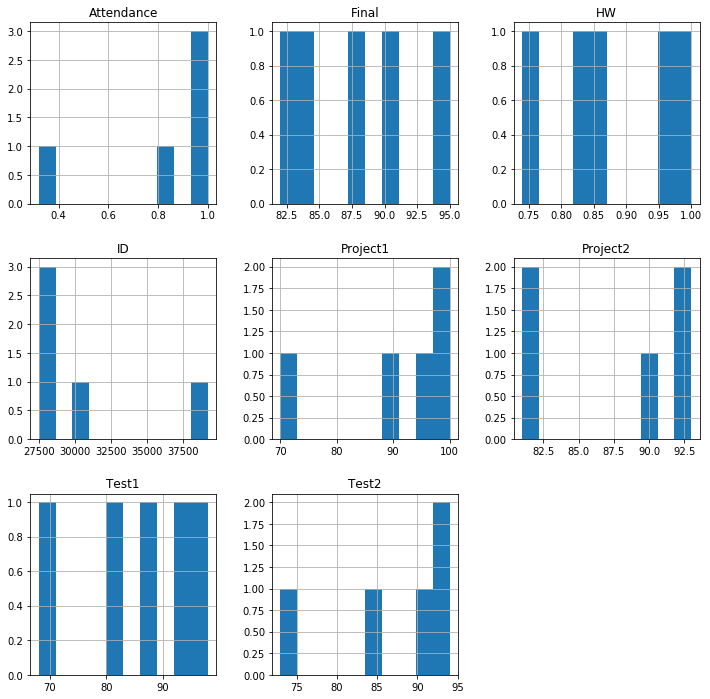

In [168]:
# Função hist()
df_student.hist(figsize=(12,12));